In [1]:
import heapq
import time
import matplotlib.pyplot as plt
# start with a graph represented as an adjacency matrix with edge weights
def dijkstra(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0
    pq = [(0, start)]
    
    while pq:
        curr_dist, u = heapq.heappop(pq)
        if curr_dist > dist[u]:
            continue
        
        for v, edge_dist in graph[u]:
            new_dist = dist[u] + edge_dist
            if new_dist < dist[v]:
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))
    # here we return the graph represented as an adjacency list with edge weights as a tuple 
    return dist

def build_graph_and_find_shortest_paths(N, routes):
    graph = [[] for _ in range(N)]
    
    #here add the shortest path to the graph
    for x, y, t in routes:
        graph[x-1].append((y-1, t))
    
    shortest_distances = dijkstra(graph, 0)
    
    return N, N-1, [(1, i+1, shortest_distances[i]) for i in range(1, N)]

def measure_adjacency_matrix(N, routes):
    start_time = time.time()
    build_graph_and_find_shortest_paths(N, routes)
    return time.time() - start_time

def measure_priority_queue(N, routes):
    start_time = time.time()
    dijkstra(build_graph_and_find_shortest_paths(N, routes), 0)
    return time.time() - start_time

def plot_time_vs_vertices(N_values, routes):
    adjacency_matrix_times = []
    priority_queue_times = []
    
    for N in N_values:
        subgraph = routes[:N-1]
        
        adj_matrix_time = measure_adjacency_matrix(N, subgraph)
        adjacency_matrix_times.append(adj_matrix_time)
        
        pq_time = measure_priority_queue(N, subgraph)
        priority_queue_times.append(pq_time)
    
    return adjacency_matrix_times, priority_queue_times

if __name__ == "__main__":
    N_values = [10, 50, 100, 200, 500, 1000]  # Different numbers of vertices to test
    
    # Generate routes for testing
    routes = [
        (1, 2, 1),
        (1, 4, 5),
        (2, 3, 2),
        (2, 5, 1),
        (2, 4, 2),
        (3, 6, 2),
        (3, 5, 3),
        (5, 6, 2)
    ]
    
    adjacency_matrix_times, priority_queue_times = plot_time_vs_vertices(N_values, routes)
    
    plt.plot(N_values, adjacency_matrix_times, label='Adjacency Matrix')
    plt.plot(N_values, priority_queue_times, label='Priority Queue')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Time Taken (seconds)')
    plt.legend()
    plt.title('Time Complexity Comparison')
    plt.show()


TypeError: 'int' object is not iterable

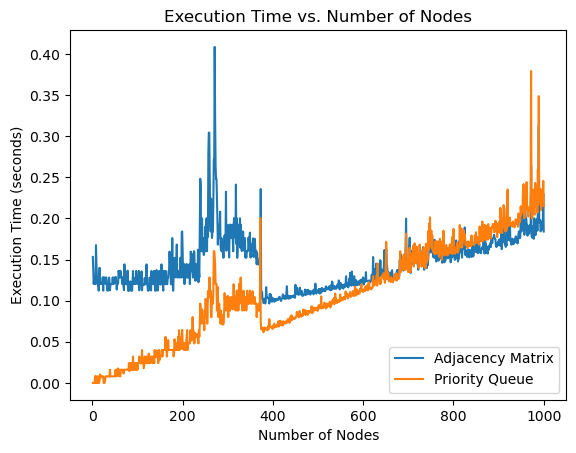

1000 999
1 2 1
1 3 3
1 4 3
1 5 2
1 6 4
1 7 inf
1 8 inf
1 9 inf
1 10 inf
1 11 inf
1 12 inf
1 13 inf
1 14 inf
1 15 inf
1 16 inf
1 17 inf
1 18 inf
1 19 inf
1 20 inf
1 21 inf
1 22 inf
1 23 inf
1 24 inf
1 25 inf
1 26 inf
1 27 inf
1 28 inf
1 29 inf
1 30 inf
1 31 inf
1 32 inf
1 33 inf
1 34 inf
1 35 inf
1 36 inf
1 37 inf
1 38 inf
1 39 inf
1 40 inf
1 41 inf
1 42 inf
1 43 inf
1 44 inf
1 45 inf
1 46 inf
1 47 inf
1 48 inf
1 49 inf
1 50 inf
1 51 inf
1 52 inf
1 53 inf
1 54 inf
1 55 inf
1 56 inf
1 57 inf
1 58 inf
1 59 inf
1 60 inf
1 61 inf
1 62 inf
1 63 inf
1 64 inf
1 65 inf
1 66 inf
1 67 inf
1 68 inf
1 69 inf
1 70 inf
1 71 inf
1 72 inf
1 73 inf
1 74 inf
1 75 inf
1 76 inf
1 77 inf
1 78 inf
1 79 inf
1 80 inf
1 81 inf
1 82 inf
1 83 inf
1 84 inf
1 85 inf
1 86 inf
1 87 inf
1 88 inf
1 89 inf
1 90 inf
1 91 inf
1 92 inf
1 93 inf
1 94 inf
1 95 inf
1 96 inf
1 97 inf
1 98 inf
1 99 inf
1 100 inf
1 101 inf
1 102 inf
1 103 inf
1 104 inf
1 105 inf
1 106 inf
1 107 inf
1 108 inf
1 109 inf
1 110 inf
1 111 inf
1 112 i

In [20]:
import networkx as nx
import heapq
import time
import matplotlib.pyplot as plt


N, M = 1000,2000
edges = [
    (1, 2, 1),
    (1, 4, 5),
    (2, 3, 2),
    (2, 5, 1),
    (2, 4, 2),
    (3, 6, 2),
    (3, 5, 3),
    (5, 6, 2)
]


def syn_graphs(N):
    G = nx.Graph()
    for i in range(1, N + 1):
        for j in range(i + 1, N + 1):
            weight = i * j % 10 + 1
            G.add_edge(i, j, weight=weight)
    return G


def adj_mat(graph):
    INF = float('inf')
    adj_matrix = [[INF] * (N + 1) for _ in range(N + 1)]
    for u, v, t in graph.edges(data=True):
        adj_matrix[u][v] = t['weight']
        adj_matrix[v][u] = t['weight']
    return adj_matrix

def create_pq(graph):
    pq = [(0, 1)]  
    distances = [float('inf')] * (N + 1)
    distances[1] = 0
    return pq, distances

def adj_mat_djik(adj_matrix):
    INF = float('inf')
    distances = [INF] * (N + 1)
    visited = [False] * (N + 1)
    distances[1] = 0

    for _ in range(N):
        u = -1
        for i in range(1, N + 1):
            if not visited[i] and (u == -1 or distances[i] < distances[u]):
                u = i

        visited[u] = True
        for v in range(1, N + 1):
            if not visited[v] and adj_matrix[u][v] != INF:
                distances[v] = min(distances[v], distances[u] + adj_matrix[u][v])

    return distances


def djik_pq(pq, distances, adj_matrix):
    while pq:
        dist, u = heapq.heappop(pq)
        if dist > distances[u]:
            continue
        for v in range(1, N + 1):
            if adj_matrix[u][v] != float('inf') and distances[u] + adj_matrix[u][v] < distances[v]:
                distances[v] = distances[u] + adj_matrix[u][v]
                heapq.heappush(pq, (distances[v], v))

def generate_output(distances):
    print(N, N - 1)
    for y in range(2, N + 1):
        print(1, y, distances[y])


def measure_and_plot_timing(graph_sizes):
    adjacency_matrix_times = []
    priority_queue_times = []

    for size in graph_sizes:
        G = syn_graphs(size)

        adj_matrix = adj_mat(G)
        start_time = time.time()
        adj_mat_djik(adj_matrix)
        adjacency_matrix_times.append(time.time() - start_time)

        pq, distances = create_pq(G)
        start_time = time.time()
        djik_pq(pq, distances, adj_matrix)
        priority_queue_times.append(time.time() - start_time)

    plt.plot(graph_sizes, adjacency_matrix_times, label='Adjacency Matrix')
    plt.plot(graph_sizes, priority_queue_times, label='Priority Queue')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.title('Execution Time vs. Number of Nodes')
    plt.show()
graph_sizes_to_test = list(range(1, 1001))

measure_and_plot_timing(graph_sizes_to_test)
adj_matrix = create_adjacency_matrix(edges)
distances = dijkstra_adjacency_matrix(adj_matrix)
generate_output(distances)


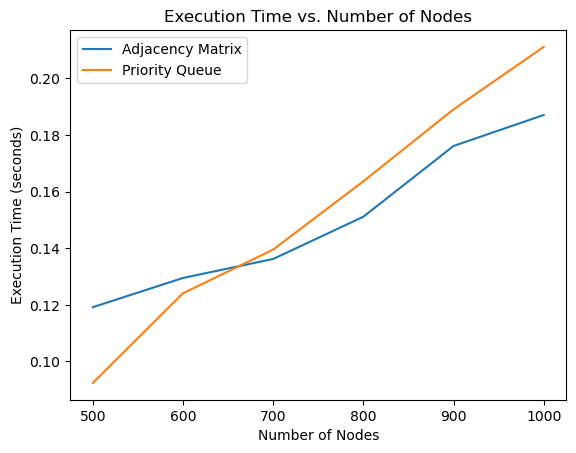

1000 999
1 2 1
1 3 3
1 4 3
1 5 2
1 6 4
1 7 inf
1 8 inf
1 9 inf
1 10 inf
1 11 inf
1 12 inf
1 13 inf
1 14 inf
1 15 inf
1 16 inf
1 17 inf
1 18 inf
1 19 inf
1 20 inf
1 21 inf
1 22 inf
1 23 inf
1 24 inf
1 25 inf
1 26 inf
1 27 inf
1 28 inf
1 29 inf
1 30 inf
1 31 inf
1 32 inf
1 33 inf
1 34 inf
1 35 inf
1 36 inf
1 37 inf
1 38 inf
1 39 inf
1 40 inf
1 41 inf
1 42 inf
1 43 inf
1 44 inf
1 45 inf
1 46 inf
1 47 inf
1 48 inf
1 49 inf
1 50 inf
1 51 inf
1 52 inf
1 53 inf
1 54 inf
1 55 inf
1 56 inf
1 57 inf
1 58 inf
1 59 inf
1 60 inf
1 61 inf
1 62 inf
1 63 inf
1 64 inf
1 65 inf
1 66 inf
1 67 inf
1 68 inf
1 69 inf
1 70 inf
1 71 inf
1 72 inf
1 73 inf
1 74 inf
1 75 inf
1 76 inf
1 77 inf
1 78 inf
1 79 inf
1 80 inf
1 81 inf
1 82 inf
1 83 inf
1 84 inf
1 85 inf
1 86 inf
1 87 inf
1 88 inf
1 89 inf
1 90 inf
1 91 inf
1 92 inf
1 93 inf
1 94 inf
1 95 inf
1 96 inf
1 97 inf
1 98 inf
1 99 inf
1 100 inf
1 101 inf
1 102 inf
1 103 inf
1 104 inf
1 105 inf
1 106 inf
1 107 inf
1 108 inf
1 109 inf
1 110 inf
1 111 inf
1 112 i

In [23]:
import networkx as nx
import heapq
import time
import matplotlib.pyplot as plt


N, M = 1000,2000
edges = [
    (1, 2, 1),
    (1, 4, 5),
    (2, 3, 2),
    (2, 5, 1),
    (2, 4, 2),
    (3, 6, 2),
    (3, 5, 3),
    (5, 6, 2)
]


def syn_graphs(N):
    G = nx.Graph()
    for i in range(1, N + 1):
        for j in range(i + 1, N + 1):
            weight = i * j % 10 + 1
            G.add_edge(i, j, weight=weight)
    return G


def adj_mat(graph):
    INF = float('inf')
    adj_matrix = [[INF] * (N + 1) for _ in range(N + 1)]
    for u, v, t in graph.edges(data=True):
        adj_matrix[u][v] = t['weight']
        adj_matrix[v][u] = t['weight']
    return adj_matrix

def create_pq(graph):
    pq = [(0, 1)]  
    distances = [float('inf')] * (N + 1)
    distances[1] = 0
    return pq, distances

def adj_mat_djik(adj_matrix):
    INF = float('inf')
    distances = [INF] * (N + 1)
    visited = [False] * (N + 1)
    distances[1] = 0

    for _ in range(N):
        u = -1
        for i in range(1, N + 1):
            if not visited[i] and (u == -1 or distances[i] < distances[u]):
                u = i

        visited[u] = True
        for v in range(1, N + 1):
            if not visited[v] and adj_matrix[u][v] != INF:
                distances[v] = min(distances[v], distances[u] + adj_matrix[u][v])

    return distances


def djik_pq(pq, distances, adj_matrix):
    while pq:
        dist, u = heapq.heappop(pq)
        if dist > distances[u]:
            continue
        for v in range(1, N + 1):
            if adj_matrix[u][v] != float('inf') and distances[u] + adj_matrix[u][v] < distances[v]:
                distances[v] = distances[u] + adj_matrix[u][v]
                heapq.heappush(pq, (distances[v], v))

def generate_output(distances):
    print(N, N - 1)
    for y in range(2, N + 1):
        print(1, y, distances[y])


def measure_and_plot_timing(graph_sizes):
    adjacency_matrix_times = []
    priority_queue_times = []

    for size in graph_sizes:
        G = syn_graphs(size)

        adj_matrix = adj_mat(G)
        start_time = time.time()
        adj_mat_djik(adj_matrix)
        adjacency_matrix_times.append(time.time() - start_time)

        pq, distances = create_pq(G)
        start_time = time.time()
        djik_pq(pq, distances, adj_matrix)
        priority_queue_times.append(time.time() - start_time)

    plt.plot(graph_sizes, adjacency_matrix_times, label='Adjacency Matrix')
    plt.plot(graph_sizes, priority_queue_times, label='Priority Queue')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.legend()
    plt.title('Execution Time vs. Number of Nodes')
    plt.show()
graph_sizes_to_test = [500,600,700,800,900,1000]

measure_and_plot_timing(graph_sizes_to_test)
adj_matrix = create_adjacency_matrix(edges)
distances = dijkstra_adjacency_matrix(adj_matrix)
generate_output(distances)
